In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import keras
from skimage import io
import skimage
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4")
])
m.build([None, 224, 224, 3])  # Batch input shape.

In [3]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


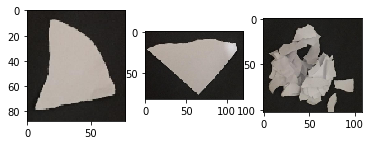

In [4]:
img0 = io.imread("cropped/img_0.jpeg")
img1 = io.imread("cropped/img_1.jpeg")
img2 = io.imread("cropped/img_2.jpeg")
f, (ax0,ax1,ax2) = plt.subplots(nrows=1, ncols=3)
ax0.imshow(img0)
ax1.imshow(img1)
ax2.imshow(img2)

In [5]:
images = [img0, img1, img2]

In [6]:
reimages = []
for image in images:
    resized_image = skimage.transform.resize(image, (224,224,3))
    print(resized_image.shape)
    reimages.append(resized_image)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


/home/mehmet/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/mehmet/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [7]:
img3 = skimage.transform.rotate(reimages[0],45)

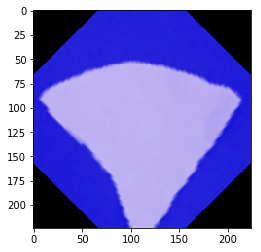

In [8]:
plt.imshow(img3)

In [9]:
reimages.append(img3)

In [10]:
reimages = np.array(reimages)

In [11]:
reimages.shape

(4, 224, 224, 3)

In [12]:
predict = m.predict(reimages)

In [27]:
predict[0]

array([ 0.32002607, -0.19780378,  0.5459386 , ..., -0.07337166,
       -0.44724572,  2.2275712 ], dtype=float32)

In [26]:
Norm_Calc(predict[2],predict[3])

Norms between = 66.83364702434062


66.83364702434062

In [31]:
standart = Standizer(predict)

In [37]:
Norm_Calc(standart[1],standart[3])

Norms between = 3.313954965911845


3.313954965911845

In [38]:
standart.reshape()

(4, 1001)

In [15]:
def Norm_Calc(A, B):
    length = len(A)
    summ = 0
    for i in range(length):
        summ = summ + (A[i]-B[i])**2
    
    result = np.sqrt(summ)
    print(f"Norms between = {result}")
    
    return result
        
    

In [30]:
def Standizer(liste):
    for pre_list in liste:
        max_val = max(pre_list)
        for j,item in enumerate(pre_list):
            pre_list[j]=item/max_val
    
    return liste
            
        